In [1]:
import re

def process_line(stdout):
    energy = []
    sign = []
    time = []
    dimer = []

    for line in str(stdout).split("\\n"):
        
        pat = "Redisplay Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
        
        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            
        pat = "dimer operator"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            dimer = [float(line)]
            
    return energy, sign, dimer, time

In [2]:
import os
import numpy as np
os.chdir("../build")
T =  np.logspace(-1, 1, num=10)

# original heisernberg model

### sampling energies for several temperature

In [3]:
import numpy as np

In [62]:
T =  np.logspace(-1, 1, num=100)
T

array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.30538555,
        0.31992671,  0.33516027,  0.35111917,  0.36783798,  0.38535286,
        0.40370173,  0.42292429,  0.44306215,  0.46415888,  0.48626016,
        0.5094138 ,  0.53366992,  0.55908102,  0.58570208,  0.61359073,
        0.64280731,  0.67341507,  0.70548023,  0.7390722 ,  0.77426368,
        0.81113083,  0.84975344,  0.89021509,  0.93260335,  0.97700996,
        1.02353102,  1.07226722,  1.12332403,  1.17681195,  1.23284674,
        1.29154967,  1.35304777,  1.41747416,  1.48496826,  1.55567614,
        1.62975083,  1.70735265,  1.78864953,  1.87381742,  1.96304065,
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47

In [64]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for t in T:
    out = subprocess.Popen(["./SS", "-L", "2", "-D", "2", "-T", "{:.2f}".format(t), "-J1", "1", "-J2", "1"  ,"-m", "10000", "-n", "1000000", "-M", "shastry_v1"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()
    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy, sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)

T = 0.1 [-1.13432, 12.1767] [0.001236, 0.001]
T = 0.10476157527896648 [-12.7747, 11.1181] [0.00183, 0.000999999]
T = 0.10974987654930562 [-12.5398, 3.70145] [0.004808, 0.000999989]
T = 0.11497569953977356 [11.0403, 17.3052] [-0.000812, 0.001]
T = 0.12045035402587821 [-11.9514, 2.79947] [-0.006156, 0.000999982]
T = 0.12618568830660204 [-9.51807, 6.02201] [-0.00273, 0.000999997]
T = 0.1321941148466029 [-8.09476, 4.95956] [0.003082, 0.000999996]
T = 0.1384886371393873 [-0.945675, 18.2775] [0.000984, 0.001]
T = 0.14508287784959398 [-5.92773, 14.1355] [-0.001272, 0.001]
T = 0.1519911082952934 [-3.85204, 9.00751] [0.00163, 0.000999999]
T = 0.1592282793341092 [-5.28366, 9.95986] [-0.00158, 0.000999999]
T = 0.16681005372000587 [-6.75487, 10.6755] [-0.001568, 0.000999999]
T = 0.17475284000076838 [-11.2635, 8.42097] [0.002178, 0.000999998]
T = 0.18307382802953684 [-3.25513, 10.8504] [-0.001406, 0.001]
T = 0.19179102616724888 [-5.75263, 15.3751] [0.001204, 0.001]
T = 0.20092330025650468 [8480.42,

In [59]:
energy_v1 = np.array(energy_array)
sign_v1 = np.array(sign_array)

### plot together with exact value

In [60]:
sign_array = np.array(sign_array)
energy_array = np.array(energy_array)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


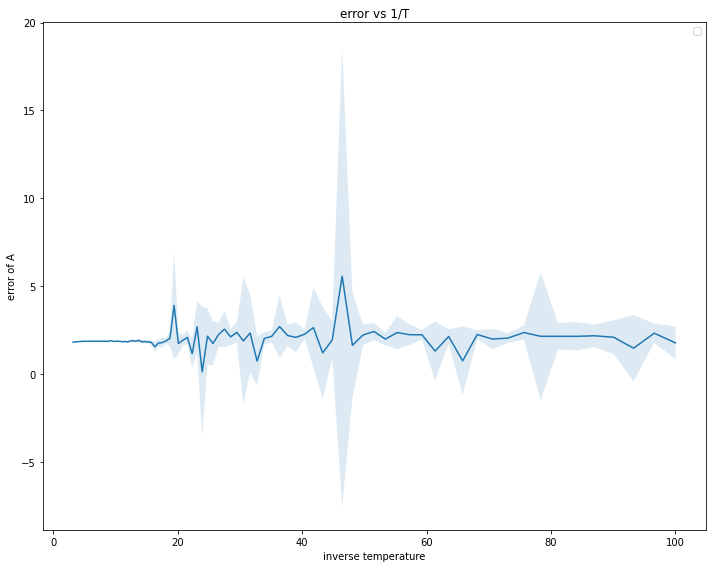

In [61]:
import matplotlib.pyplot as plt
X = np.log(1/T[0:])
Y = np.log(1/np.abs(sign_array[:,0]))

fig, ax1 = plt.subplots(figsize = (10,8))
from scipy.stats import linregress
res = linregress(X, y=Y, alternative='two-sided')

ax1.plot(1/T[0:],np.abs(energy_array[:,0]))
ax1.fill_between(1/T[0:], np.abs(energy_array[:,0])+energy_array[:,1], np.abs(energy_array[:,0])-energy_array[:,1], alpha=0.15)

ax1.set_title('error vs 1/T')
ax1.set_xlabel('inverse temperature')
ax1.set_ylabel('error of A')
ax1.legend()
# ax1.set_xscale('log')
# ax1.set_yscale('log')
plt.tight_layout()


# fig.savefig(f"../doc/img/shastry_v1_J1={J1}.png")
plt.show()


In [35]:
res.slope

1.8713516604114224

In [36]:
res.intercept

-0.7953876363522627

# unitary transformed shastry-surtherland model

In [160]:
energy_array = []
sign_array = []
time_array = []
dmer_array = []
T =  np.logspace(-1, 1, num=10)
for t in T:
    out = subprocess.Popen(["./main", "-L", "2", "-T", "{:.2f}".format(t), "-H", "0",  "-J1", f"{J1}", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
#     print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    dimer_array.append(dimer)


In [161]:
energy_v2 = np.array(energy_array)
sign_v2 = np.array(sign_array)
dimer_v2 = np.array(dimer_array)

### plot together with exact value

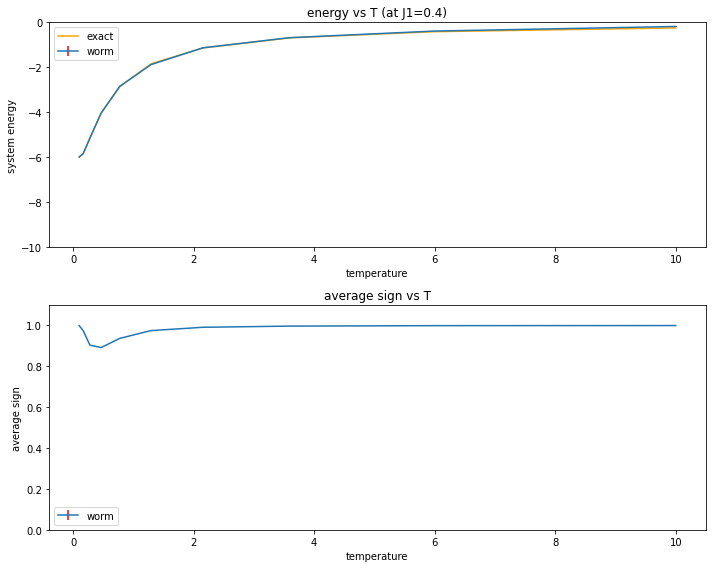

In [173]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(T[0:],energy_v2[0:,0], yerr = energy_v2[0:,1], ecolor='red', label='worm')
ax1.plot(T[0:],energy_exact, color='orange',label = 'exact')
ax1.set_title(f'energy vs T (at J1={J1})')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)
ax1.errorbar(T[0:],sign_v2[0:,0], yerr = sign_v2[0:,1], ecolor='red',label='worm')
ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()
ax1.set_ylim(0,1.1)

plt.tight_layout()

fig.savefig(f"../doc/img/shastry_v2_J1={J1}.png")
plt.show()


## compare energy

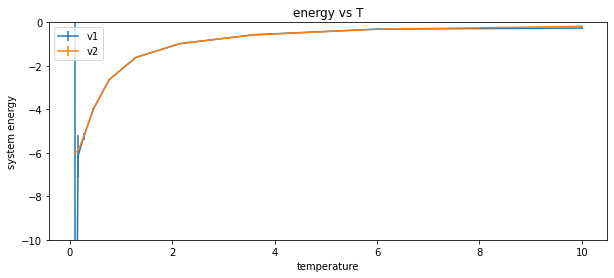

In [84]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,4))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(1,1,1)

ax1.errorbar(T[0:],energy_v1[0:,0], yerr = energy_v1[0:,1], label='v1')
ax1.errorbar(T[0:],energy_v2[0:,0], yerr = energy_v2[0:,1], label='v2')
ax1.set_title('energy vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('system energy')
ax1.set_ylim(-10, 0)
ax1.legend()
plt.savefig(f"../doc/img/comp_ene_J1={J1}.png")
plt.show()


## compare average sign

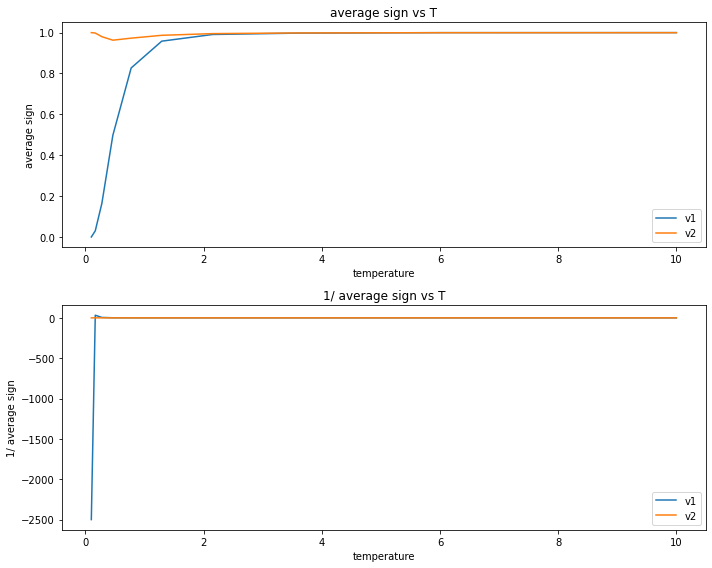

In [85]:
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(T[0:],sign_v1[0:,0],label='v1')
ax1.plot(T[0:],sign_v2[0:,0],label='v2')

ax1.set_title('average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('average sign')
ax1.legend()

ax1 = fig.add_subplot(2,1,2)
ax1.plot(T[0:],1/sign_v1[0:,0],label='v1')
ax1.plot(T[0:],1/sign_v2[0:,0],label='v2')

ax1.set_title('1/ average sign vs T')
ax1.set_xlabel('temperature')
ax1.set_ylabel('1/ average sign')
ax1.legend()

plt.tight_layout()

plt.savefig(f"../doc/img/avesign_J1={J1}.png")
plt.show()


# change J1 with fixed temperature (T = 1)

In [142]:
import numpy as np
J1 = np.linspace(0, 1, 21)
T = 0.1

In [143]:
import subprocess
energy_array = []
sign_array = []
time_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", f"{T}", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
energy_j_v1 = np.array(energy_array)
sign_j_v1 = np.array(sign_array)
time_j_v1 = np.array(time_array)

J1 = 0.0 [-6.00936, 0.00423081]
J1 = 0.05 [-6.00152, 0.0137596]
J1 = 0.1 [-5.99861, 0.0321037]
J1 = 0.15000000000000002 [-5.98426, 0.0709796]
J1 = 0.2 [-6.03365, 0.195705]
J1 = 0.25 [-5.86119, 0.831413]
J1 = 0.30000000000000004 [-7.78432, 13.7395]
J1 = 0.35000000000000003 [-8.17987, 7.34317]
J1 = 0.4 [-9.37874, 14.7619]
J1 = 0.45 [-8.48189, 14.2313]
J1 = 0.5 [-16.05, 284.052]
J1 = 0.55 [-8.89266, 10.5761]
J1 = 0.6000000000000001 [-17.25, 106.022]
J1 = 0.65 [-10.844, 18.0439]
J1 = 0.7000000000000001 [-9.83826, 9.60412]
J1 = 0.75 [-10.8057, 8.41686]
J1 = 0.8 [-11.2275, 9.38004]
J1 = 0.8500000000000001 [-12.7098, 23.1028]
J1 = 0.9 [-11.8381, 9.73821]
J1 = 0.9500000000000001 [-11.2971, 9.10798]
J1 = 1.0 [-23.9735, 126.821]


In [144]:
import subprocess
energy_array = []
sign_array = []
time_array = []
dimer_array = []
# T =  np.logspace(-1, 1, num=50)
for j1 in J1:
    out = subprocess.Popen(["./main", "-L", "2", "-T", f"{T}", "-J1", "{:.2f}".format(j1), "-J2", "1", "-H", "0", "-D", "1" ,"-m", "10000", "-n", "100000", "-M", "shastry_v2"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout, stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"J1 = {j1}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    dimer_array.append(dimer)
energy_j_v2 = np.array(energy_array)
sign_j_v2 = np.array(sign_array)
time_j_v2 = np.array(time_array)
dimer_j_v2 = np.array(dimer_array)

J1 = 0.0 [-6.0009, 0.00281935]
J1 = 0.05 [-5.99898, 0.002906]
J1 = 0.1 [-5.99447, 0.0029729]
J1 = 0.15000000000000002 [-5.99976, 0.00303136]
J1 = 0.2 [-6.00132, 0.00310388]
J1 = 0.25 [-5.99821, 0.00316119]
J1 = 0.30000000000000004 [-5.99151, 0.00323743]
J1 = 0.35000000000000003 [-5.99521, 0.00335118]
J1 = 0.4 [-5.9892, 0.00357397]
J1 = 0.45 [-5.98872, 0.00519842]
J1 = 0.5 [-5.97186, 0.0439172]
J1 = 0.55 [8.53333, 141.505]
J1 = 0.6000000000000001 [-5.89645, 7.97526]
J1 = 0.65 [-7.69121, 18.9108]
J1 = 0.7000000000000001 [-9.30317, 9.62662]
J1 = 0.75 [-8.52281, 8.56035]
J1 = 0.8 [-8.68694, 6.05685]
J1 = 0.8500000000000001 [-9.96004, 9.62692]
J1 = 0.9 [-13.7466, 23.2384]
J1 = 0.9500000000000001 [-12.4614, 23.4631]
J1 = 1.0 [-13.2862, 15.3447]


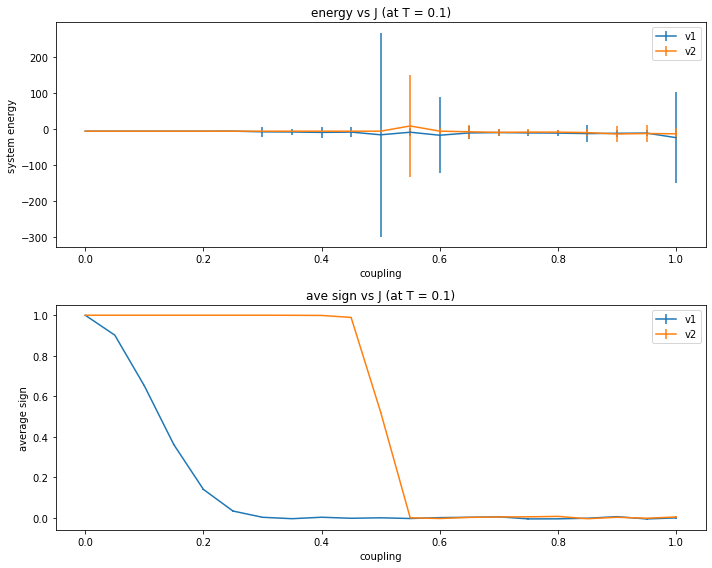

In [145]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))
# add_subplot(L, M, N)形式
ax1 = fig.add_subplot(2,1,1)

ax1.errorbar(J1[0:],energy_j_v1[0:,0], yerr = energy_j_v1[0:,1], label='v1')
ax1.errorbar(J1[0:],energy_j_v2[0:,0], yerr = energy_j_v2[0:,1], label='v2')
# ax1.errorbar(J1[0:],energy_j_v3[0:,0], yerr = energy_j_v3[0:,1], label='v3')


ax1.set_title(f'energy vs J (at T = {T})')
ax1.set_xlabel('coupling')
ax1.set_ylabel('system energy')
# ax1.set_ylim(-120, 0)
ax1.legend()


ax1 = fig.add_subplot(2,1,2)

ax1.errorbar(J1[0:],sign_j_v1[0:,0], yerr = sign_j_v1[0:,1], label='v1')
ax1.errorbar(J1[0:],sign_j_v2[0:,0], yerr = sign_j_v2[0:,1], label='v2')
# ax1.errorbar(J1[0:],sign_j_v3[0:,0], yerr = sign_j_v3[0:,1], label='v3')


ax1.set_title(f'ave sign vs J (at T = {T})')
ax1.set_xlabel('coupling')
ax1.set_ylabel('average sign')
ax1.legend()

plt.tight_layout()

plt.show()

In [138]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)
ax.plot(J1, dimer_j_v2)

ax.set_title(f'dimer vs J (at T = {T})')
ax.set_xlabel('J')
ax.set_ylabel('dimer operator')
# ax1.set_ylim(-120, 0)
ax.legend()
plt.show()


0.375

## more detail about average sign of SS model

In [4]:
J1 = 0.1

In [5]:
import subprocess
import numpy as np
energy_array = []
sign_array = []
time_array = []
dimer_array = []
T =  5*np.logspace(-3, -2, num=11)
for t in T:
    out = subprocess.Popen(["./SS", 
                            "-L", 
                            "2", 
                            "-T", 
                            "{:.4f}".format(t), 
                            "-J1", f"{J1}",
                            "-m", "10000", 
                            "-n", "100000", 
                            "-M", "shastry_v2",
                            "-PATH1", "../python/array/SS_bond_test1.npy",
                            "-PATH2", "../python/array/SS_bond_test2.npy",
                            "-PATH3", "../python/array/SS_onsite.npy",
                           ], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t} time = {time}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    dimer_array.append(dimer)


T = 0.005 time = [16.516] [-6.28062, 0.010099]
T = 0.0062946270589708374 time = [13.141] [-6.29623, 0.00816751]
T = 0.00792446596230557 time = [33.466] [-6.29055, 0.00641954]


KeyboardInterrupt: 

In [8]:
"{:.4f}".format(t), 

('0.0100',)

In [7]:
print(stdout)

b'read from args \nSystem Linear Size     = 2\nTemperature            = 0.0079\nMagnetic Field         = 0\nMCS for Thermalization = 10000\nMCS for Measurement    = 100000\nmodel name is : shastry_v2\npath : ../python/array/SS_onsite.npy\n\n\nmodel output\n[Lx, Ly] : [2, 2]\n[J1, J2] : [0.1, 1]\nh : 0\nnum local operators : 2\nbond num : [type0, type1] = [8, 8] \nend \n\nhamiltonian is read from ../python/array/SS_bond_test1.npy\n[ 0,  0] : 0.375\n[ 1,  0] : -0.050\n[ 4,  0] : -0.050\n[ 0,  1] : -0.050\n[ 1,  1] : 0.125\n[ 2,  2] : 0.125\n[ 3,  3] : 0.125\n[ 0,  4] : -0.050\n[ 4,  4] : 0.125\n[ 6,  4] : -0.050\n[ 9,  4] : -0.050\n[ 5,  5] : -0.175\n[ 4,  6] : -0.050\n[ 6,  6] : -0.125\n[ 9,  6] : 0.050\n[ 7,  7] : -0.075\n[ 8,  7] : 0.050\n[10,  7] : 0.050\n[ 7,  8] : 0.050\n[ 8,  8] : 0.125\n[13,  8] : -0.050\n[ 4,  9] : -0.050\n[ 6,  9] : 0.050\n[ 9,  9] : -0.125\n[ 7, 10] : 0.050\n[10, 10] : -0.125\n[13, 10] : 0.050\n[11, 11] : -0.125\n[12, 11] : 0.050\n[14, 11] : 0.050\n[11, 12] : 

In [66]:
dimer_j_mod = np.array(dimer_array)
sign_j_mod = np.array(sign_array)

In [68]:
sign_j_mod

array([[1.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00],
       [9.73880e-01, 7.18041e-04],
       [9.82640e-01, 5.86677e-04],
       [9.83700e-01, 5.68636e-04],
       [9.89180e-01, 4.63930e-04],
       [9.90800e-01, 4.27967e-04],
       [9.92580e-01, 3.84514e-04],
       [9.93760e-01, 3.52721e-04],
       [9.94860e-01, 3.20214e-04],
       [9.96000e-01, 2.82561e-04]])

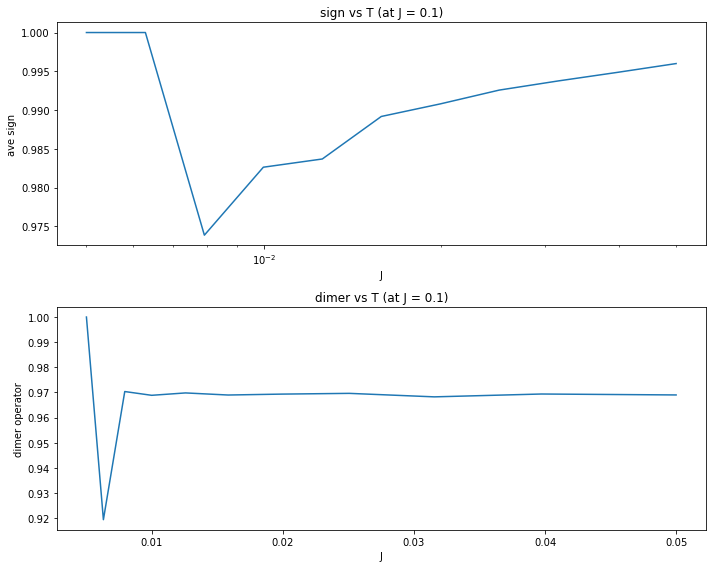

In [67]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(2,1,1)
ax.plot(T, sign_j_mod[:,0])

ax.set_title(f'sign vs T (at J = {J1})')
ax.set_xlabel('J')
ax.set_ylabel('ave sign')
# ax.set_ylim()

ax.set_xscale("log")

ax = fig.add_subplot(2,1,2)
ax.plot(T, dimer_j_mod)

ax.set_title(f'dimer vs T (at J = {J1})')
ax.set_xlabel('J')
ax.set_ylabel('dimer operator')
plt.tight_layout()

plt.savefig(f"../doc/img/avesign_modham_dtl_J1_v2={J1}.png")
plt.show()